In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [34]:
schooldata_csv = pd.read_csv("all_interesting_info.csv")
schooldata_csv.head()

,id,latest.admissions.admission_rate.overall,latest.aid.median_debt.completers.overall,latest.aid.median_debt.female_students,latest.aid.median_debt.male_students,latest.aid.median_debt.noncompleters,latest.completion.completion_rate_4yr_150nt,latest.completion.completion_rate_four_year_100_pooled,latest.cost.attendance.academic_year,latest.cost.tuition.in_state,...,latest.repayment.5_yr_repayment.completers_rate,latest.repayment.5_yr_repayment.female_students_rate,latest.repayment.5_yr_repayment.male_students_rate,latest.repayment.7_yr_repayment.completers_rate,latest.repayment.7_yr_repayment.female_students_rate,latest.repayment.7_yr_repayment.male_students_rate,latest.student.demographics.female_share,location.lat,location.lon,school.name
0,459842,1.0000,23139.5,12250.0,9500.0,7730.0,0.3478,0.2000,26772.0,13390.0,...,0.495575,0.316121,0.364816,0.627481,0.374540,0.556589,0.813547,42.603889,-87.857452,Herzing University-Kenosha
1,457022,1.0000,23139.5,12250.0,9500.0,7730.0,0.2708,0.4000,26916.0,13390.0,...,0.495575,0.316121,0.364816,0.627481,0.374540,0.556589,0.813547,41.639266,-83.665453,Herzing University-Toledo
2,184694,0.7909,25000.0,20000.0,16709.0,9649.0,0.5317,0.3850,53748.0,40234.0,...,0.777037,0.670504,0.683209,0.861512,0.730086,0.767308,0.588029,40.774498,-74.432121,Fairleigh Dickinson University-Florham Campus
3,445708,0.8174,25899.0,17850.0,17668.0,7666.5,0.5722,0.3753,44949.0,30746.0,...,0.822471,0.696578,0.681546,0.810641,0.705139,0.672380,0.635340,35.233502,-80.851208,Johnson & Wales University-Charlotte
4,146481,0.5694,27000.0,26000.0,25500.0,8250.0,0.6990,0.6482,54777.0,44116.0,...,0.899160,0.818462,0.832618,0.934247,0.894737,0.859649,0.603041,42.249574,-87.827454,Lake Forest College


In [35]:
median_debt_completers=schooldata_csv["latest.aid.median_debt.completers.overall"]
school_name = schooldata_csv["school.name"]
median_debt_female = schooldata_csv['latest.aid.median_debt.female_students']
median_debt_male = schooldata_csv['latest.aid.median_debt.male_students']
latest_10year_mean_earnings = schooldata_csv["latest.earnings.10_yrs_after_entry.working_not_enrolled.mean_earnings"]
latest_10year_mean_earnings_stdev = schooldata_csv["latest.earnings.10_yrs_after_entry.working_not_enrolled.std_dev"]
latest_8year_mean_earnings = schooldata_csv["latest.earnings.8_yrs_after_entry.mean_earnings"]
latest_8year_mean_earnings_stdev = schooldata_csv["latest.earnings.8_yrs_after_entry.std_deviation"]
latest_6year_mean_earnings = schooldata_csv["latest.earnings.6_yrs_after_entry.working_not_enrolled.mean_earnings"]
latest_6year_mean_earnings_stdev = schooldata_csv["latest.earnings.6_yrs_after_entry.working_not_enrolled.std_dev"]


#8 year data is recorded as a different field than 6 year and 10 year, but represents the same thing

debt_v_earnings = pd.DataFrame({
    'school name':school_name,
    'completed median debt': median_debt_completers,
    'median female count in debt': median_debt_female,
    'median male count in debt': median_debt_male,
    '10 year mean earnings':latest_10year_mean_earnings,
    '10 year earnings std dev':latest_10year_mean_earnings_stdev,
    '8 year mean earnings':latest_8year_mean_earnings,
    '8 year earnings std dev':latest_8year_mean_earnings_stdev,
    '6 year mean earnings':latest_6year_mean_earnings,
    '6 year earnings std dev':latest_6year_mean_earnings_stdev,
})
debt_v_earnings.head()

,school name,completed median debt,median female count in debt,median male count in debt,10 year mean earnings,10 year earnings std dev,8 year mean earnings,8 year earnings std dev,6 year mean earnings,6 year earnings std dev
0,Herzing University-Kenosha,23139.5,12250.0,9500.0,41600.0,27900.0,35100.0,24200.0,30100.0,20500.0
1,Herzing University-Toledo,23139.5,12250.0,9500.0,41600.0,27900.0,35100.0,24200.0,30100.0,20500.0
2,Fairleigh Dickinson University-Florham Campus,25000.0,20000.0,16709.0,54400.0,44900.0,48800.0,35400.0,42300.0,29100.0
3,Johnson & Wales University-Charlotte,25899.0,17850.0,17668.0,42200.0,28500.0,37600.0,24300.0,33400.0,19500.0
4,Lake Forest College,27000.0,26000.0,25500.0,55600.0,35300.0,50900.0,33700.0,41100.0,25700.0


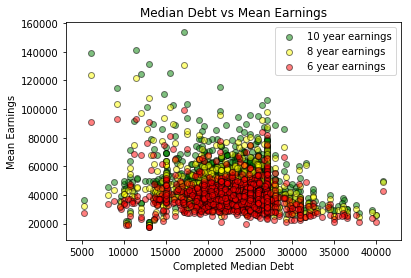

In [61]:
#values of interest
x1 = debt_v_earnings['completed median debt']
y1 = debt_v_earnings['10 year mean earnings']
y2 = debt_v_earnings['8 year mean earnings']
y3 = debt_v_earnings['6 year mean earnings']
#not sure if i can incorperate this
z1 = debt_v_earnings['median female count in debt']
z2 = debt_v_earnings['median male count in debt']

#median debt vs 10 years
plt.scatter(x1, y1, color='green', label = '10 year earnings', marker='o', alpha = 0.5, linewidth = 1 , edgecolor = 'black')
#median debt vs 8 years
plt.scatter(x1, y2, color='yellow', label = '8 year earnings', marker='o', alpha = 0.5, linewidth = 1 , edgecolor = 'black')
#median debt vs 6 years
plt.scatter(x1, y3, color='red', marker='o', label = '6 year earnings', alpha = 0.5, linewidth = 1 , edgecolor = 'black')

#labels on chart
plt.xlabel("Completed Median Debt")
plt.ylabel("Mean Earnings")
plt.title("Median Debt vs Mean Earnings")

# Create a legend
lgnd = plt.legend(loc="best")

#save figure
plt.savefig('median_debt_vs_mean_earnings.png', bbox_inches='tight')

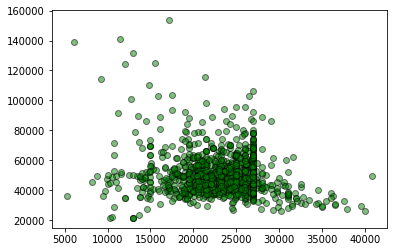

In [37]:
#median debt vs 10 years
plt.scatter(x1, y1, color='green', marker='o', alpha = 0.5, linewidth = 1 , edgecolor = 'black')

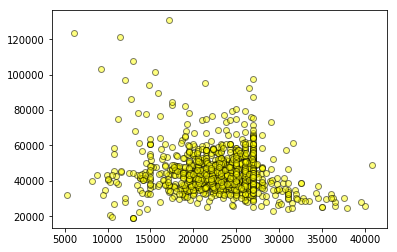

In [29]:
#median debt vs 8 years
plt.scatter(x1, y2, color='yellow', marker='o', alpha = 0.5, linewidth = 1 , edgecolor = 'black')


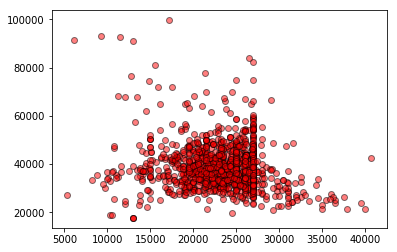

In [30]:
#median debt vs 6 years

plt.scatter(x1, y3, color='red', marker='o', alpha = 0.5, linewidth = 1 , edgecolor = 'black')

In [31]:
#completion rate vs cost
#get school name from debt vs earning dataframe
school_name = schooldata_csv["school.name"]
academic_cost_year = schooldata_csv['latest.cost.attendance.academic_year']
tuition_outstate = schooldata_csv['latest.cost.tuition.out_of_state']
tuition_instate = schooldata_csv['latest.cost.tuition.in_state']
completion_rate_100 = schooldata_csv['latest.completion.completion_rate_four_year_100_pooled']
completion_rate_150 = schooldata_csv['latest.completion.completion_rate_4yr_150nt']

completion_rate_v_cost = pd.DataFrame({
    'school name':school_name,
    'academic yearly cost': academic_cost_year,
    'out of state tuition': tuition_outstate,
    'in-state tuition': tuition_instate,
    'completion in four years (100% expected time)':completion_rate_100,
    'completion in four years (150% expected time)': completion_rate_150,
})
completion_rate_v_cost.head()

,school name,academic yearly cost,out of state tuition,in-state tuition,completion in four years (100% expected time),completion in four years (150% expected time)
0,Herzing University-Kenosha,26772.0,13390.0,13390.0,0.2000,0.3478
1,Herzing University-Toledo,26916.0,13390.0,13390.0,0.4000,0.2708
2,Fairleigh Dickinson University-Florham Campus,53748.0,40234.0,40234.0,0.3850,0.5317
3,Johnson & Wales University-Charlotte,44949.0,30746.0,30746.0,0.3753,0.5722
4,Lake Forest College,54777.0,44116.0,44116.0,0.6482,0.6990


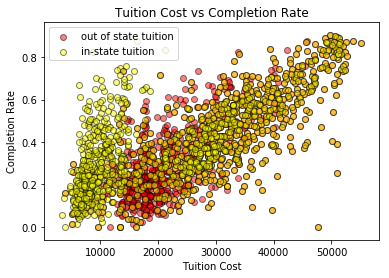

In [62]:
#values of interest
x1 = completion_rate_v_cost['academic yearly cost']
x2 = completion_rate_v_cost['out of state tuition']
x3 = completion_rate_v_cost['in-state tuition']
y1 = completion_rate_v_cost['completion in four years (150% expected time)']
y2 = completion_rate_v_cost['completion in four years (100% expected time)']

plt.scatter(x2, y2, color='red', marker='o', label = 'out of state tuition', alpha = 0.5, linewidth = 1 , edgecolor = 'black')
plt.scatter(x3, y2, color='yellow', marker='o', label = 'in-state tuition', alpha = 0.5, linewidth = 1 , edgecolor = 'black')

#labels on chart
plt.xlabel("Tuition Cost")
plt.ylabel("Completion Rate")
plt.title("Tuition Cost vs Completion Rate")

# Create a legend
lgnd = plt.legend(loc="best")

#save figure
plt.savefig('tuition_v_completion.png', bbox_inches='tight')